# Text Mining with R

## The Robinson Crusoe text data

I used the Robinson Crusoe text data available from the Project Gutenberg.
Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works, as well as to encourage the creation and distribution of eBooks.It was founded in 1971 by American writer Michael S. Hart and is the oldest digital library.
Project Gutenberg had reached 60,000 items in its collection of free eBooks.

To analyze the text data from Chapters 2 and 5 of Robinson Crusoe, I used the scan() function, which is suitable for reading in unstructured data with varying lengths. I provided the web address where the text data is stored as an argument to the scan() function. For the what option, I used "character", and for the encoding, I used "UTF-8". I loaded the document on a per-line basis by specifying seq = "\n".

In [9]:
RC <- scan("https://www.gutenberg.org/files/521/521-0.txt",
           what = "character", encoding = "UTF-8", sep = "\n")

I used the grep() function to locate the beginning and end of Chapters 2 and 5 in the text data. The grep() function is useful for finding specific patterns in text data. I extracted only the sentences between the start and end of each chapter and saved them as RC_body2 and RC_body5, respectively. 

In [14]:
RC_Chpt2 <- grep(RC, pattern = "CHAPTER II. SLAVERY AND ESCAPE")
RC_End2 <- grep(RC, pattern = "me to lie upon.")
RC_body2 <- RC[RC_Chpt2:RC_End2]

RC_Chpt5 <- grep(RC, pattern = "CHAPTER V. BUILDS A HOUSE")
RC_End5 <- grep(RC, pattern = "look for more.")
RC_body5 <- RC[RC_Chpt5:RC_End5]


In [39]:
RC_body2[1:30]

[1] "CHAPTER II. SLAVERY AND ESCAPE"                                         
 [2] "That evil influence which carried me first away from my father’s"      
 [3] "house<U+2014>which hurried me into the wild and indigested notion of raising"
 [4] "my fortune, and that impressed those conceits so forcibly upon me as to"
 [5] "make me deaf to all good advice, and to the entreaties and even the"    
 [6] "commands of my father<U+2014>I say, the same influence, whatever it was,"
 [7] "presented the most unfortunate of all enterprises to my view; and I"    
 [8] "went on board a vessel bound to the coast of Africa; or, as our sailors"
 [9] "vulgarly called it, a voyage to Guinea."                                
[10] "It was my great misfortune that in all these adventures I did not ship" 
[11] "myself as a sailor; when, though I might indeed have worked a little"   
[12] "harder than ordinary, yet at the same time I should have learnt the"    
[13] "duty and office of a fore-mast man, and in time might have qualified"   
[14] "myself for a mate or lieutenant, if not for a master. But as it was"    
[15] "always my fate to choose for the worse, so I did here; for having money"
[16] "in my pocket and good clothes upon my back, I would always go on board" 
[17] "in the habit of a gentleman; and so I neither had any business in the"  
[18] "ship, nor learned to do any."                                           
[19] "It was my lot first of all to fall into pretty good company in London," 
[20] "which does not always happen to such loose and misguided young fellows" 
[21] "as I then was; the devil generally not omitting to lay some snare for"  
[22] "them very early; but it was not so with me. I first got acquainted with"
[23] "the master of a ship who had been on the coast of Guinea; and who,"     
[24] "having had very good success there, was resolved to go again. This"     
[25] "captain taking a fancy to my conversation, which was not at all"        
[26] "disagreeable at that time, hearing me say I had a mind to see the"      
[27] "world, told me if I would go the voyage with him I should be at no"     
[28] "expense; I should be his messmate and his companion; and if I could"    
[29] "carry anything with me, I should have all the advantage of it that the" 
[30] "trade would admit; and perhaps I might meet with some encouragement."

In [40]:
RC_body5[1:30]

[1] "CHAPTER V. BUILDS A HOUSE<U+2014>THE JOURNAL"                            
 [2] "September 30, 1659.<U+2014>I, poor miserable Robinson Crusoe, being"     
 [3] "shipwrecked during a dreadful storm in the offing, came on shore on"     
 [4] "this dismal, unfortunate island, which I called “The Island of"         
 [5] "Despair”; all the rest of the ship’s company being drowned, and myself"
 [6] "almost dead."                                                            
 [7] "All the rest of the day I spent in afflicting myself at the dismal"      
 [8] "circumstances I was brought to<U+2014>viz. I had neither food, house, clothes,"
 [9] "weapon, nor place to fly to; and in despair of any relief, saw nothing"  
[10] "but death before me<U+2014>either that I should be devoured by wild beasts,"
[11] "murdered by savages, or starved to death for want of food. At the"       
[12] "approach of night I slept in a tree, for fear of wild creatures; but"    
[13] "slept soundly, though it rained all night."                              
[14] "_October_ 1.<U+2014>In the morning I saw, to my great surprise, the ship had"
[15] "floated with the high tide, and was driven on shore again much nearer"   
[16] "the island; which, as it was some comfort, on one hand<U+2014>for, seeing her"
[17] "set upright, and not broken to pieces, I hoped, if the wind abated, I"   
[18] "might get on board, and get some food and necessaries out of her for my" 
[19] "relief<U+2014>so, on the other hand, it renewed my grief at the loss of my"
[20] "comrades, who, I imagined, if we had all stayed on board, might have"    
[21] "saved the ship, or, at least, that they would not have been all drowned" 
[22] "as they were; and that, had the men been saved, we might perhaps have"   
[23] "built us a boat out of the ruins of the ship to have carried us to some" 
[24] "other part of the world. I spent great part of this day in perplexing"   
[25] "myself on these things; but at length, seeing the ship almost dry, I"    
[26] "went upon the sand as near as I could, and then swam on board. This day" 
[27] "also it continued raining, though with no wind at all."                  
[28] "_From the 1st of October to the 24th_.<U+2014>All these days entirely spent in"
[29] "many several voyages to get all I could out of the ship, which I"        
[30] "brought on shore every tide of flood upon rafts. Much rain also in the"

I performed data preprocessing on the text data from the two loaded chapters. Since the rows in the text data are separated by the delimiter "\n," I used the paste() function to concatenate the rows into a single vector by adding a space (" ") between each row with the collapse = " " argument. The concatenated text for Chapter 2 was saved as RC_all2 and for Chapter 5 as RC_all5.

Next, I used the gsub() function to replace the apostrophes ('s') used in contractions such as the possessive form of "is" with a space (" "), and removed all punctuation marks except for apostrophes and hyphens. I also converted all letters to lowercase.

In [17]:
RC_all2 <- paste(RC_body2, collapse = " ")
RC_all2 <- gsub(RC_all2, pattern = "'s", replacement = "")
RC_all2 <- gsub(RC_all2, pattern = "([^[:alnum:][:blank:]'-])", replacement = "")
RC_all2 <- tolower(RC_all2)

In [18]:
RC_all5 <- paste(RC_body5, collapse = " ")
RC_all5 <- gsub(RC_all5, pattern = "'s", replacement = "")
RC_all5 <- gsub(RC_all5, pattern = "([^[:alnum:][:blank:]'-])", replacement = "")
RC_all5 <- tolower(RC_all5)

In [19]:
install.packages("stopwords")
install.packages("textstem")
library(stopwords)
library(textstem)

'C:/Users/bbb/Documents/R/win-library/4.1'의 위치에 패키지(들)을 설치합니다.
(왜냐하면 'lib'가 지정되지 않았기 때문입니다)



package 'stopwords' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpUZeYCa\downloaded_packages


'C:/Users/bbb/Documents/R/win-library/4.1'의 위치에 패키지(들)을 설치합니다.
(왜냐하면 'lib'가 지정되지 않았기 때문입니다)



package 'textstem' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpUZeYCa\downloaded_packages


필요한 패키지를 로딩중입니다: koRpus.lang.en

필요한 패키지를 로딩중입니다: koRpus

필요한 패키지를 로딩중입니다: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()




To remove stopwords, it is convenient to first separate the connected documents into individual words. To do this, we used the strsplit() function to split the text by whitespace and then converted the resulting list into a vector using the unlist() function. We then applied a command to the vectors RC_all2 and RC_all5 to remove stopwords and any elements that only contained whitespace (" ").

In [20]:
RC_all2 <- unlist(strsplit(RC_all2," "))
RC_all2 <- RC_all2[! RC_all2 %in% c(stopwords(),"")]

RC_all5 <- unlist(strsplit(RC_all5," "))
RC_all5 <- RC_all5[! RC_all5 %in% c(stopwords(),"")]

The final step of the preprocessing was to remove the remaining apostrophes and restore the base forms of words. We first removed the apostrophes to avoid potential issues with removing stopwords that contain apostrophes. After removing the stopwords, we restored the base forms of the remaining words.

In [21]:
RC_all2 <- gsub(RC_all2, pattern = "'", replacement = "")
RC_all2 <- lemmatize_strings(RC_all2)

RC_all5 <- gsub(RC_all5, pattern = "'", replacement = "")
RC_all5 <- lemmatize_strings(RC_all5)

The preprocessed data, RC_all2 and RC_all5, were used to create frequency tables using the table() function. To display the words in descending order of frequency, the sort() function was applied. In Chapter 2, the words "go" and "take" appeared most frequently, while in Chapter 5, "make" and "day" were the most common words.

In [36]:
RC_all2_table <- sort(table(RC_all2), decreasing = TRUE)[1:30]
RC_all5_table <- sort(table(RC_all5),decreasing = TRUE)[1:30]

In [37]:
RC_all2_table

RC_all2
    go   take  shore    say   make   come   good   xury   boat     us little 
    44     31     28     26     25     22     22     22     21     21     19 
   see   upon    lie    man    may   ship    get   know    one    two   fish 
    19     18     17     16     16     16     15     14     14     14     13 
 great   moor   find  shoot    boy  bring  coast  first 
    13     13     12     12     11     11     11     11 

In [38]:
RC_all5_table

RC_all5
  make    day     go   time   upon   rain   work  begin little    may    see 
    45     31     27     27     25     21     21     20     20     18     18 
   one  place   good though   cave   find  think   wall   come   like   much 
    17     17     16     16     15     15     15     15     14     14     14 
 thing    two   rock   take finish  great  never   next 
    13     13     12     12     11     11     11     11 

In [27]:
install.packages("wordcloud2")
library(wordcloud2)
library(RColorBrewer)

'C:/Users/bbb/Documents/R/win-library/4.1'의 위치에 패키지(들)을 설치합니다.
(왜냐하면 'lib'가 지정되지 않았기 때문입니다)



package 'wordcloud2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpUZeYCa\downloaded_packages


I visualized the frequent words in chapter 2 of Robinson Crusoe using barplot and wordcloud2.

HTML widgets cannot be represented in plain text (need html)

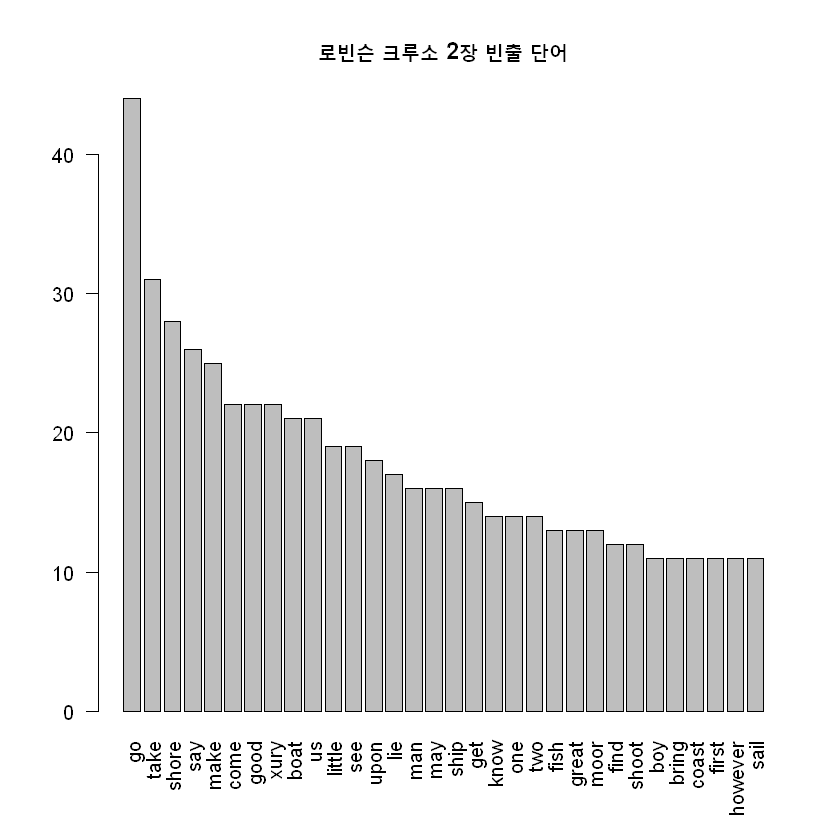

In [29]:
barplot(RC_all2_table[1:32], las=2)
title(main="로빈슨 크루소 2장 빈출 단어")

wordcloud2(RC_all2_table, size=0.5)

I visualized the frequent words in chapter 5 of Robinson Crusoe using barplot and wordcloud2.

HTML widgets cannot be represented in plain text (need html)

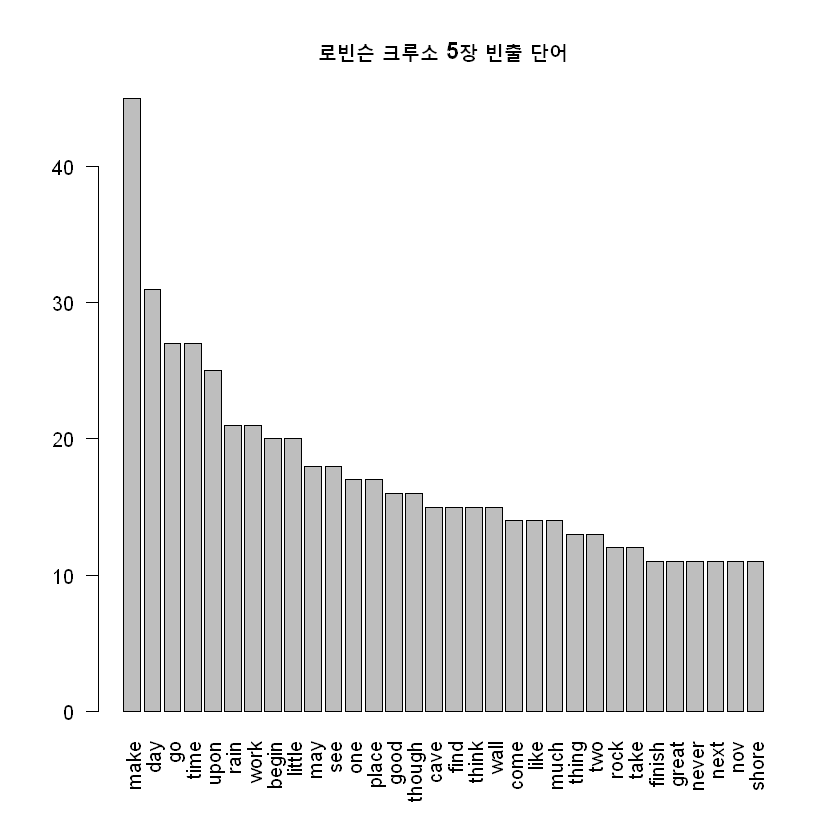

In [30]:
barplot(RC_all5_table[1:32], las=2)
title(main="로빈슨 크루소 5장 빈출 단어")

wordcloud2(RC_all5_table, size=0.5)

I have calculated the cosine similarity between Robinson Crusoe chapter 2 and chapter 5.

Cosine similarity is commonly used to measure the similarity of text data such as words, sentences, and documents, and it is expressed similarly to correlation coefficients. Cosine similarity represents the angle between two vectors represented in a vector space, and it can be considered as an uncentralized correlation coefficient between two vectors. Unlike correlation coefficients that can range from -1 to 1, cosine similarity of a document-word matrix ranges from 0 to 1. The values of each element of the two vectors x and y represent the frequency of word occurrence, and they always have non-negative values. Therefore, the numerator of cosine similarity is always non-negative, and the cosine similarity itself also always has non-negative values. When two vectors x and y are identical, the cosine similarity becomes 1 and reaches its maximum value.

In [31]:
RC_2_5 <- c(RC_body2, RC_body5)


RC25 <- unlist(strsplit(paste(RC_2_5, collapse = " "),
                        "CHAPTER"))[-1]

RC25 <- gsub(x = RC25, pattern = "'s", replacement = "")
RC25 <- gsub(RC25, pattern = "([^[:alnum:][:blank:]'-])", replacement = "")
RC25 <- tolower(RC25)
RC25 <- strsplit(RC25, " ")
RC25 <- lapply(RC25,
    function(x) x[! x %in% c(stopwords(), " ")])

RC25 <- lapply(RC25, lemmatize_strings)
RC25_lev <- sort(unique(unlist(RC25)))


[1]    2 1384

[1] 1737

[1] 1031

corrplot 0.92 loaded



1.0000000,0.6302815
0.6302815,1.0000000


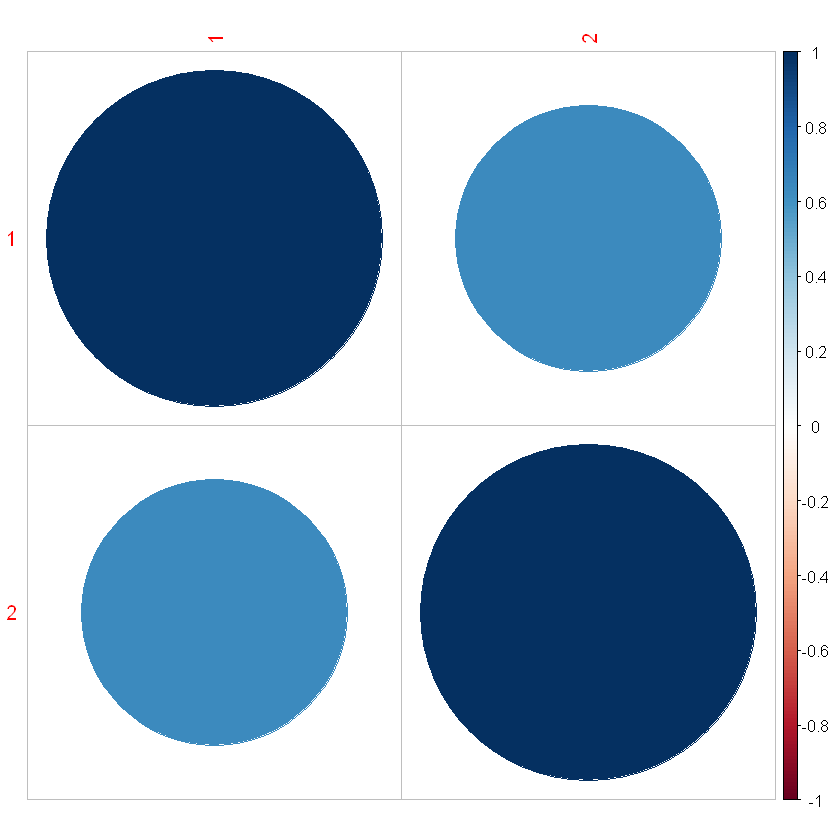

In [32]:
RC_dtm25 <- lapply(RC25, FUN = function(x, lev)
    {table(factor(x, lev, ordered = T))}, lev=RC25_lev)
RC_dtm25 <- matrix(unlist(RC_dtm25), nrow = length(RC_dtm25),
    byrow = TRUE)

dim(RC_dtm25 > 0)
sum(RC_dtm25 > 0)
sum(RC_dtm25 == 0)

RC_dtm25sqr <- RC_dtm25 %*% t(RC_dtm25)
RC_cossim <- RC_dtm25sqr / sqrt(diag(RC_dtm25sqr) %*%
    t(diag(RC_dtm25sqr)))
set.seed(1)

library(corrplot)
corrplot(RC_cossim)


RC_cossim


Looking at the results, we can see that the cosine similarity between chapters 2 and 5 of Robinson Crusoe is 0.630, which is relatively high and suggests that there is some similarity between the two chapters. The cosine similarity is visualized using the corrplot() function from the corrplot package, with blue circles representing the positive values of cosine similarity between the two chapters.